# Cours PCD – Labo 4 : ACP sur des images

## Tâches et questions



In [17]:
%matplotlib inline

## Question 1

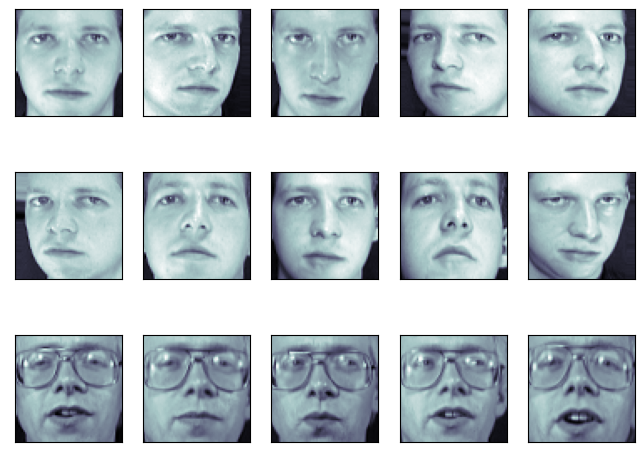

In [32]:
from sklearn import datasets
from matplotlib import pyplot as plt

faces = datasets.fetch_olivetti_faces()
faces.data.shape

fig = plt.figure(figsize=(8, 6))
# plot several images
for i in range(15):
    ax = fig.add_subplot(3, 5, i + 1, xticks=[], yticks=[])
    ax.imshow(faces.images[i], cmap=plt.cm.bone)

### a)
```datasets.fetch_olivetti_faces()``` retourne le dataset "Olivetti Faces". Ce dataset est un ensemble d'images de visages de personnes.

`faces.data` est un tableau de 400 images représentées chacune par un tableau de 64 * 64 pixels. Les images sont en noir et blanc donc les pixels sont représentés par un seule valeur numérique entre 0 et 1.

### b)
Il y a 40 personnes différentes (donc 40 "classes") et 10 images pour chaque personne.

### c)
Comme dit au point *a)*, chaque image est composée de 64*64 (4096) pixels représentés chacun par un nombre à virgule entre 0 et 1.

### d)

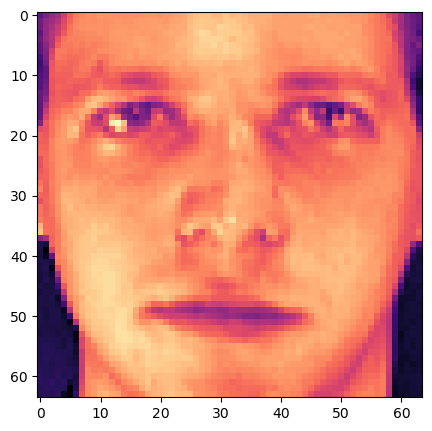

In [36]:
# Point 1.d)

import matplotlib.pyplot as plt
fig = plt.figure(figsize=(5,5))
img = fig.add_subplot(1,1,1)
img.imshow(faces.images[0], cmap='magma')

## Question 2

In [55]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(faces.data,
        faces.target, random_state=0,stratify=faces.target, train_size=0.8)

# On a bien 80% du dataset en train et le reste en test
print(X_train.shape, X_test.shape)

# On a bien 80% des 10 éléments (donc 8) pour chaque classe (visage)
print(np.unique(np.sort(y_train), return_counts=True))

(320, 4096) (80, 4096)
(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39]), array([8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8,
       8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8], dtype=int64))


## Question 3

0.875
0.8667857142857143


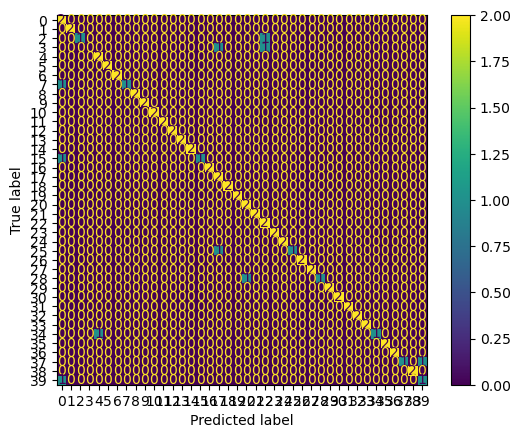

In [63]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import ConfusionMatrixDisplay

clf = KNeighborsClassifier(n_neighbors=5)
clf.fit(X_train, y_train)
prediction = clf.predict(X_test)
print(accuracy_score(y_test, prediction))
print(f1_score(y_test, prediction, average="macro"))

ConfusionMatrixDisplay.from_predictions(y_test, prediction)

## TODO : CONTINUER LA PROCHAINE FOIS :)))))))))))))))


In [21]:
from sklearn import decomposition
pca = decomposition.PCA(n_components=150, whiten=True)
pca.fit(X_train)

PCA(n_components=150, whiten=True)

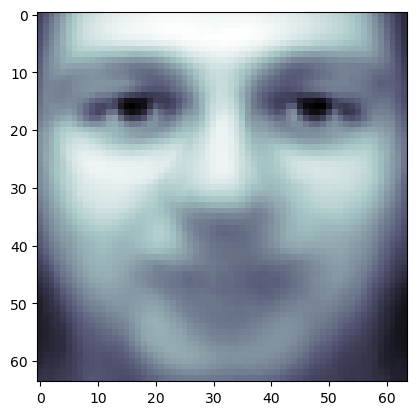

In [22]:
plt.imshow(pca.mean_.reshape(faces.images[0].shape),
           cmap=plt.cm.bone)

In [23]:
print(pca.components_.shape)

(150, 4096)


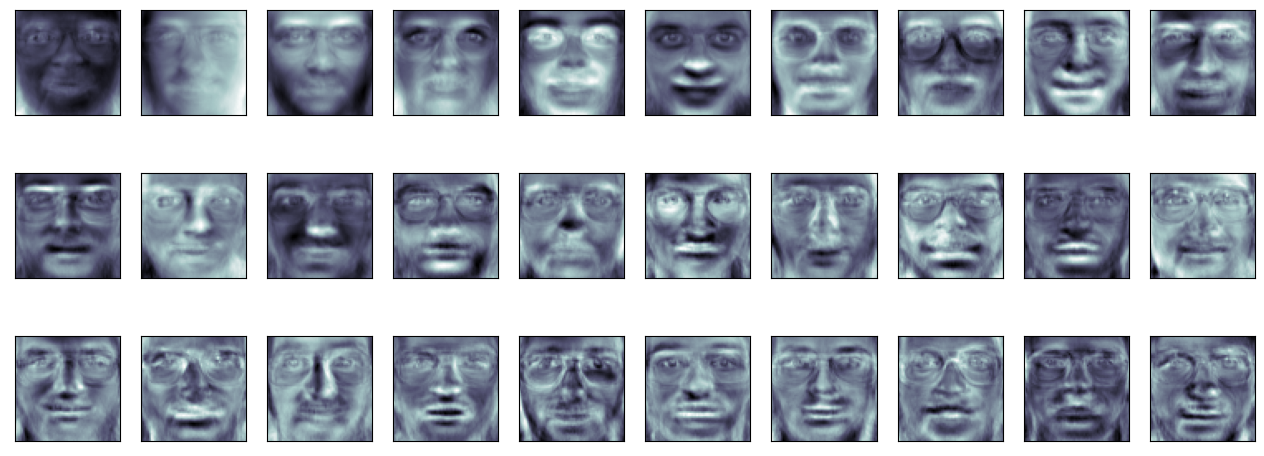

In [24]:
fig = plt.figure(figsize=(16, 6))
for i in range(30):
    ax = fig.add_subplot(3, 10, i + 1, xticks=[], yticks=[])
    ax.imshow(pca.components_[i].reshape(faces.images[0].shape),
              cmap=plt.cm.bone)

In [25]:
X_train_pca = pca.transform(X_train)
X_test_pca = pca.transform(X_test)
print(X_train_pca.shape)

(300, 150)


In [26]:
print(X_test_pca.shape)

(100, 150)


In [27]:
from sklearn import svm
clf = svm.SVC(C=5., gamma=0.001)
clf.fit(X_train_pca, y_train)

SVC(C=5.0, gamma=0.001)

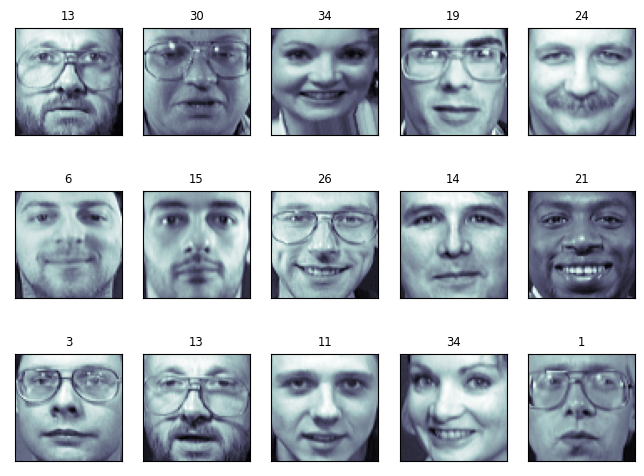

In [28]:
import numpy as np
fig = plt.figure(figsize=(8, 6))
for i in range(15):
    ax = fig.add_subplot(3, 5, i + 1, xticks=[], yticks=[])
    ax.imshow(X_test[i].reshape(faces.images[0].shape),
              cmap=plt.cm.bone)
    y_pred = clf.predict(X_test_pca[i, np.newaxis])[0]
    color = ('black' if y_pred == y_test[i] else 'red')
    ax.set_title(y_pred, fontsize='small', color=color)

In [29]:
from sklearn import metrics
y_pred = clf.predict(X_test_pca)
print(metrics.classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.50      0.67         6
           1       1.00      1.00      1.00         4
           2       0.50      1.00      0.67         2
           3       1.00      1.00      1.00         1
           4       0.25      1.00      0.40         1
           5       1.00      1.00      1.00         5
           6       1.00      1.00      1.00         4
           7       1.00      0.67      0.80         3
           9       1.00      1.00      1.00         1
          10       1.00      1.00      1.00         4
          11       1.00      1.00      1.00         1
          12       0.67      1.00      0.80         2
          13       1.00      1.00      1.00         3
          14       1.00      1.00      1.00         5
          15       1.00      1.00      1.00         3
          17       1.00      1.00      1.00         6
          19       1.00      1.00      1.00         4
          20       1.00    

In [30]:
print(metrics.confusion_matrix(y_test, y_pred))

[[3 0 0 ... 0 0 0]
 [0 4 0 ... 0 0 0]
 [0 0 2 ... 0 0 0]
 ...
 [0 0 0 ... 3 0 0]
 [0 0 0 ... 0 1 0]
 [0 0 0 ... 0 0 3]]


In [31]:
from sklearn.pipeline import Pipeline
clf = Pipeline([('pca', decomposition.PCA(n_components=150, whiten=True)),
                ('svm', svm.LinearSVC(C=1.0))])

clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)
print(metrics.confusion_matrix(y_pred, y_test))
plt.show()

[[3 0 0 ... 0 0 0]
 [0 4 0 ... 0 0 0]
 [0 0 1 ... 0 0 0]
 ...
 [0 0 0 ... 3 0 0]
 [0 0 0 ... 0 1 0]
 [0 0 0 ... 0 0 3]]


c:\Users\lcsch\anaconda3\envs\isd\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
